# **Árboles de Decisión - Clasificación de Flores Iris (Variedades: SETOSA, VERSICOLOR, VIRGINICA)**

# Predicción de Flores Iris

El objetivo es predecir la variedad de flores Iris entre:
*   0 = SETOSA
*   1 = VERSICOLOR
*   2 = VIRGINICA

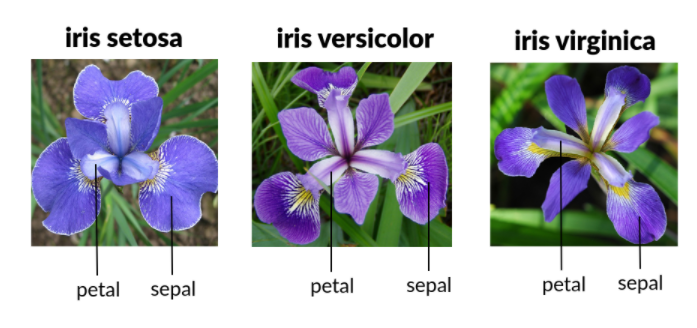


In [1]:
# librerías Árboles de Decisión
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

# librerías gráficas
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
%matplotlib inline
plt.rcParams['figure.figsize'] = (32, 18)
plt.style.use('ggplot')

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [4]:
from sklearn.tree import DecisionTreeClassifier

**Resumen estadistico de los datos**

**target corresponde al label 0: Iris-SETOSA; 1: Iris-VERSICOLOR; 2:Iris-VIRGINICA**

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**Cantidad de muestras agrupadas por label 0: Iris- SETOSA, 1: Iris-VERSICOLOR, 2:Iris-VIRGINICA**

In [9]:
print(df.groupby('target').size())

target
0    50
1    50
2    50
dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


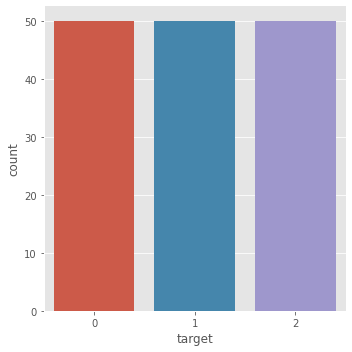

In [10]:
sb.factorplot('target',data=df,kind="count")

**Visualización de Datos**

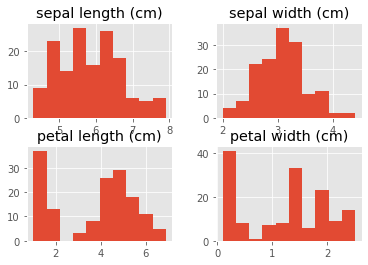

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
df.drop(['target'], axis=1).hist()
plt.show()

**Plot por Pares - Correlación entre variables, 0: Iris- SETOSA, 1: Iris-VERSICOLOR, 2:Iris-VIRGINICA**

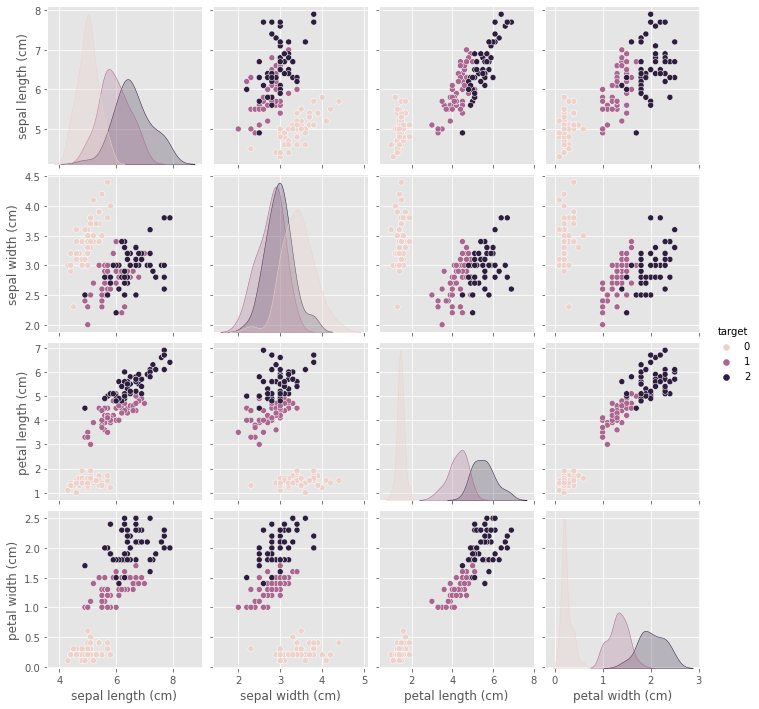

In [ ]:
sns.pairplot(df, hue="target")
sns.set()
plt.show()

**Selección de características usando SelectKBest con la que podemos seleccionar las 4 mejores**

In [12]:
from sklearn.feature_selection import SelectKBest
X=df.drop(['target'], axis=1)
y=df['target']
 
best=SelectKBest(k=4)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


**Grado de correlación de características (Matriz de correlación de Pearson)**

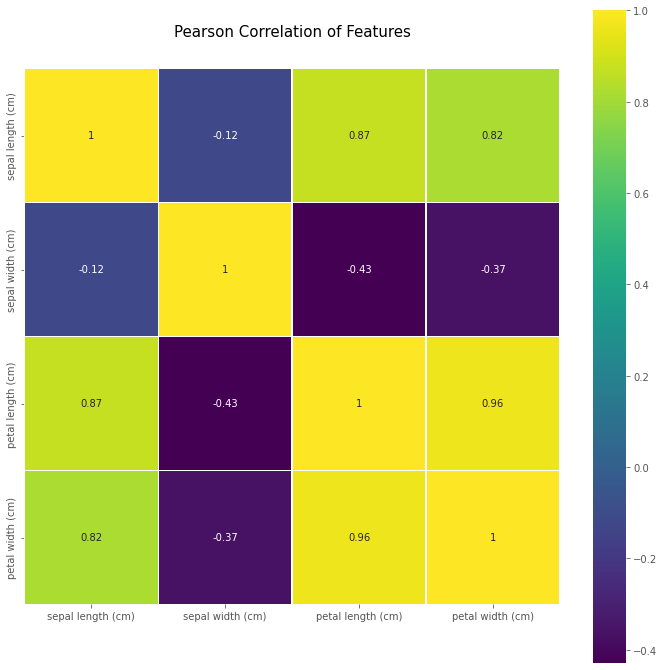

In [13]:
from matplotlib import colors
import seaborn as sb

used_features =X.columns[selected]
 
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(df[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

**Profundidad del árbol según número de atributos (variables)**

In [14]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(df))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:1}) 
                                                                   
    for train_fold, valid_fold in cv.split(df):
        f_train = df.loc[train_fold] 
        f_valid = df.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['target'], axis=1), 
                               y = f_train["target"]) 
        valid_acc = model.score(X = f_valid.drop(['target'], axis=1), 
                                y = f_valid["target"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dataframe = dataframe[["Max Depth", "Average Accuracy"]]
print(dataframe.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.319643
         2          0.917857
         3          0.917857
         4          0.917857
         5          0.917857


In [15]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(df))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(criterion='gini',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:1}) 
                                                                   
    for train_fold, valid_fold in cv.split(df):
        f_train = df.loc[train_fold] 
        f_valid = df.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['target'], axis=1), 
                               y = f_train["target"]) 
        valid_acc = model.score(X = f_valid.drop(['target'], axis=1), 
                                y = f_valid["target"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dataframe = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dataframe = dataframe[["Max Depth", "Average Accuracy"]]
print(dataframe.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.319643
         2          0.917857
         3          0.917857
         4          0.917857
         5          0.917857


In [16]:
clf = DecisionTreeClassifier(max_depth = 4, 
                             random_state = 0)

In [17]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

**Tamaño dataset de entrenamiento (train 74.6%) vs dataset de prueba (test 25.4%)**

In [18]:
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

112
38
112
38


**Ejemplo de Predicción del Modelo**



In [19]:
# Predict for 1 observation
clf.predict(X_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
print('Tamaño del dataset de prueba:')
print(X_test.shape) # Tamaño del dataset de prueba
print('Muestras Reales del dataset de prueba:')
print(X_test[0:10]) 
print('Labels Reales: 0: Iris- SETOSA, 1: Iris-VERSICOLOR, 2:Iris-VIRGINICA')
print(Y_test[0:10])
print('Predicción de especies: 0: Iris- SETOSA, 1: Iris-VERSICOLOR, 2:Iris-VIRGINICA')
clf.predict(X_test[0:10])

Tamaño del dataset de prueba:
(38, 4)
Muestras Reales del dataset de prueba:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
114                5.8               2.8                5.1               2.4
62                 6.0               2.2                4.0               1.0
33                 5.5               4.2                1.4               0.2
107                7.3               2.9                6.3               1.8
7                  5.0               3.4                1.5               0.2
100                6.3               3.3                6.0               2.5
40                 5.0               3.5                1.3               0.3
86                 6.7               3.1                4.7               1.5
76                 6.8               2.8                4.8               1.4
71                 6.1               2.8                4.0               1.3
Labels Reales: 0: Iris- SETOSA, 1: Iris-VERSICOLOR, 2:Iris-VIRGIN

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

**Cálculo de la Exactitud (accuracy) del Modelo**

In [20]:
# The score method returns the accuracy of the model
score = clf.score(X_test, Y_test)
print(score)

0.9736842105263158


In [22]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    accuracy.append(score)


In [23]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
3,petal width (cm),0.5806
2,petal length (cm),0.3993
1,sepal width (cm),0.0201
0,sepal length (cm),0.0000


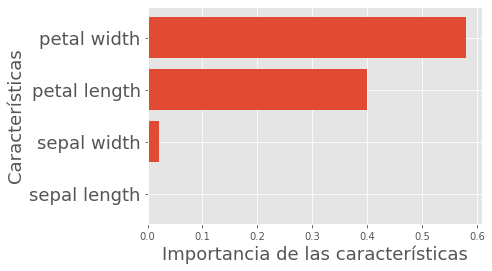

In [24]:
#Se evalua la importancia de las caractrísticas (variables)
#con la función feature_importance_ de la librería sklearn
caract=4

plt.barh(range(caract), clf.feature_importances_)
plt.yticks(np.arange(caract),['sepal length', 'sepal width', 'petal length','petal width'], size=18)
plt.xlabel('Importancia de las características', size=18)
plt.ylabel('Características', size=18)

plt.show()


**Visualización del Árbol**

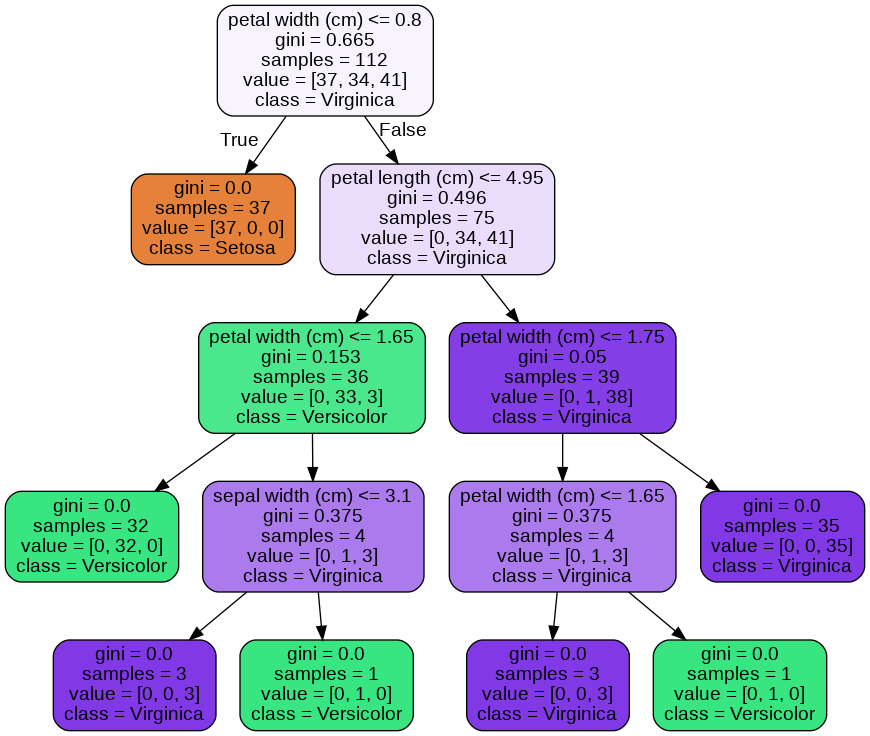

In [25]:
# Crear Arbol de decision con profundidad = 4
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf,
                              out_file=f,
                              max_depth = 4,
                              impurity = True,
                              feature_names = list(df.drop(['target'], axis=1)),
                              class_names = ['Setosa', 'Versicolor', 'Virginica'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

**Métrica de Exactitud en Entrenamiento (train)**





In [26]:
acc_decision_tree = round(clf.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree,'%')

100.0 %


**Métrica de Exactitud en Validación (test)**

In [27]:
acc_decision_tree = round(clf.score(X_test, Y_test) * 100, 2)
print(acc_decision_tree,'%')

97.37 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


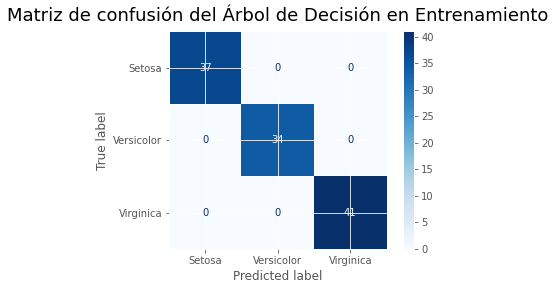

In [28]:
disp = plot_confusion_matrix(clf, X_train, Y_train,
                                 display_labels=['Setosa', 'Versicolor', 'Virginica'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol de Decisión en Entrenamiento', y=1.02, size=18)

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


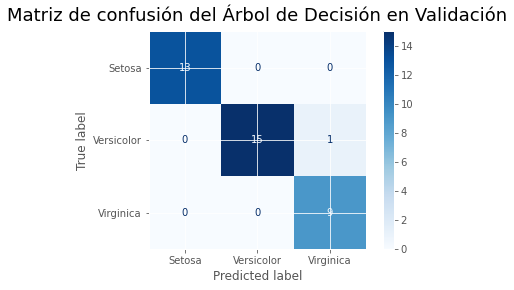

In [29]:
disp = plot_confusion_matrix(clf, X_test, Y_test,
                                 display_labels=['Setosa', 'Versicolor', 'Virginica'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Árbol de Decisión en Validación', y=1.02, size=18)

plt.show()

In [30]:
print(X_test[0:5])
print(Y_test[0:5])
print(clf.predict([[ 5.8,       2.8,      5.1,     2.4],
                   [ 6,         2.2,        4,       0],
                   [ 5.5,       4.2,      1.4,     0.2],
                   [ 7.3,       2.9,      6.3,     1.8],
                   [ 5.0,       3.4,      1.5,     0.2]
                   ]))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
114                5.8               2.8                5.1               2.4
62                 6.0               2.2                4.0               1.0
33                 5.5               4.2                1.4               0.2
107                7.3               2.9                6.3               1.8
7                  5.0               3.4                1.5               0.2
114    2
62     1
33     0
107    2
7      0
Name: target, dtype: int64
[2 0 0 2 0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


# **Clasificador Bayesiano GNB (Gaussian Naive Bayes)**

In [31]:
# librerías Gaussian Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer

In [32]:
from sklearn.feature_selection import SelectKBest
X=df.drop(['target'], axis=1)
y=df['target']
 
best=SelectKBest(k=4)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [33]:
# Instantiate the classifier
used_features =X.columns[selected]
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    Y_train
)
Y_pred = gnb.predict(X_test[used_features])
 
print('Exactitud en el Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], Y_train)))
print('Exactitud en la Validación (test): {:.2f}'
     .format(gnb.score(X_test[used_features], Y_test)))

Exactitud en el Entrenamiento: 0.95
Exactitud en la Validación (test): 1.00


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


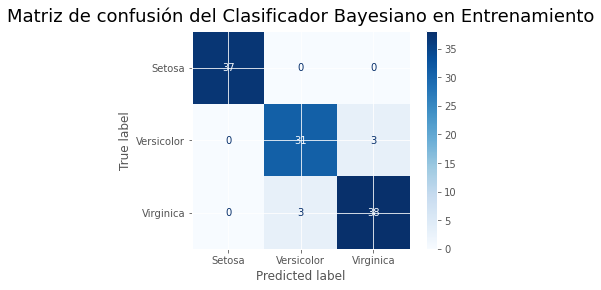

In [34]:
disp = plot_confusion_matrix(gnb, X_train, Y_train,
                                 display_labels=['Setosa', 'Versicolor', 'Virginica'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Clasificador Bayesiano en Entrenamiento', y=1.02, size=18)

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


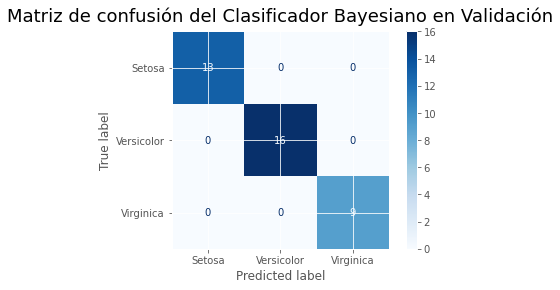

In [35]:
disp = plot_confusion_matrix(gnb, X_test, Y_test,
                                 display_labels=['Setosa', 'Versicolor', 'Virginica'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Matriz de confusión del Clasificador Bayesiano en Validación', y=1.02, size=18)

plt.show()

**target   0: Iris- SETOSA, 1: Iris-VERSICOLOR, 2:Iris-VIRGINICA**

In [36]:
print(X_test[0:5])
print(Y_test[0:5])
print(gnb.predict([[ 5.8,       2.8,      5.1,     2.4],
                   [ 6,         2.2,        4,       0],
                   [ 5.5,       4.2,      1.4,     0.2],
                   [ 7.3,       2.9,      6.3,     1.8],
                   [ 5.0,       3.4,      1.5,     0.2]
                   ]))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
114                5.8               2.8                5.1               2.4
62                 6.0               2.2                4.0               1.0
33                 5.5               4.2                1.4               0.2
107                7.3               2.9                6.3               1.8
7                  5.0               3.4                1.5               0.2
114    2
62     1
33     0
107    2
7      0
Name: target, dtype: int64
[2 1 0 2 0]
